In [ ]:
pip install cdt

In [3]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=1
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [4]:
data = pd.read_csv("/content/generated_graph_data.csv")

In [5]:
input_data = pd.read_csv("/content/generated_graph_target.csv")
graph= nx.DiGraph(input_data.values)

In [6]:
mapping = {0: "V0", 1: "V1", 2: "V2",3: "V3", 4: "V4", 5: "V5",6: "V6", 7: "V7", 8: "V8",9: "V9", 10: "V10", 11: "V11",12: "V12", 13: "V13", 14: "V14"}
H = nx.relabel_nodes(graph, mapping)

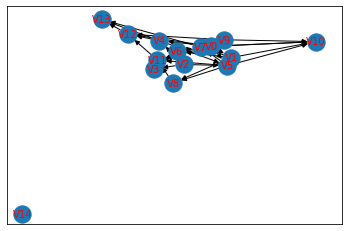

In [7]:
nx.draw_networkx(H, font_size=10, font_color='r')

100%|██████████| 13/13 [00:04<00:00,  2.89it/s, epoch=0, loss=5.62]


--- Execution time : 69.7 seconds ---


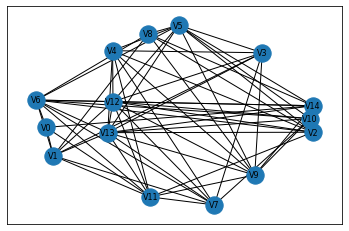

,0,1,2
0,V0,V1,8.119102e-07
1,V0,V6,1.360186e-07
2,V0,V11,1.875764e-05
3,V0,V14,1.998389e-05
4,V1,V3,2.916622e-06
...,...,...,...
60,V4,V5,1.920576e-02
61,V4,V9,3.460361e-05
62,V5,V9,4.177337e-06
63,V5,V10,2.435020e-04


In [8]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=10, test_epochs=3, lr=0.01,l1=0.1, batch_size=100,verbose=True,nruns=1)

start_time = time.time()
ugraph = Fsgnn.predict(data, threshold=1e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))


100%|██████████| 15/15 [00:05<00:00,  2.78it/s, idx=0, score=0.319]


--- Execution time : 581. seconds ---


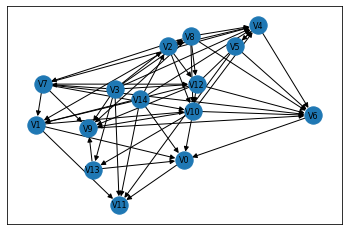

,Cause,Effect,Score
0,V1,V0,0.000921
1,V1,V10,0.009583
2,V1,V11,0.027175
3,V0,V11,0.064575
4,V6,V0,0.005483
5,V10,V4,0.060929
6,V10,V13,0.072445
7,V10,V9,0.009962
8,V10,V6,0.009835
9,V10,V0,0.004386


In [49]:
# Pairwise orientation of the edges of the graph
from cdt.causality.pairwise import GNN
from cdt.utils.graph import dagify_min_edge
start_time = time.time()

gnn = GNN(nruns=1, train_epochs=10, test_epochs=5,lr=0.01, batch_size=100,verbose=True)
ograph = dagify_min_edge(gnn.orient_graph(data, ugraph))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ograph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

100%|██████████| 13/13 [00:09<00:00,  1.36it/s, idx=0, loss=1.6]


--- Execution time : 245. seconds ---


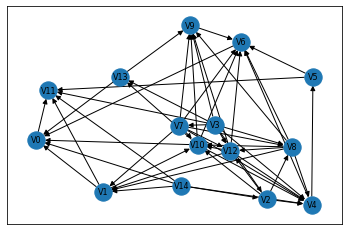

,Cause,Effect,Score
0,V1,V0,0.000921
1,V1,V10,0.009583
2,V1,V11,0.027175
3,V0,V11,0.064575
4,V6,V0,0.005483
5,V10,V4,0.060929
6,V10,V13,0.072445
7,V10,V9,0.009962
8,V10,V6,0.009835
9,V10,V0,0.004386


In [50]:
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=1, train_epochs=10, test_epochs=3,batch_size=100,verbose=True)
start_time = time.time()
dgraph = Cgnn.orient_directed_graph(data,ograph)
# dgraph = Cgnn.predict(data)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

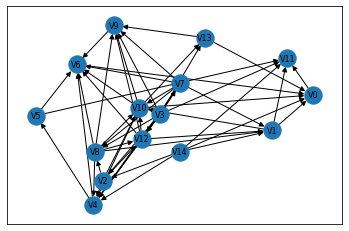

In [51]:
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 

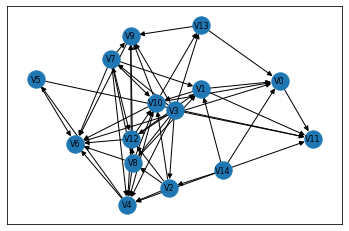

In [52]:
nx.draw_networkx(ograph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 

CGNN Metrics:
Structural hamming distance: 69
Area under the curve: 0.180


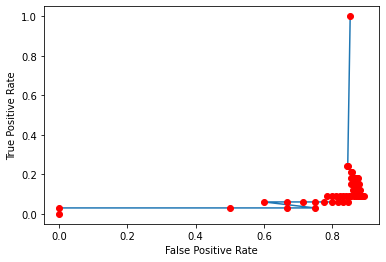

In [53]:
shd = cdt.metrics.SHD(H, dgraph)
auc, roc = cdt.metrics.precision_recall(H, dgraph)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("CGNN Metrics:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

CGNN Metrics:
Structural hamming distance: 65
Area under the curve: 0.209


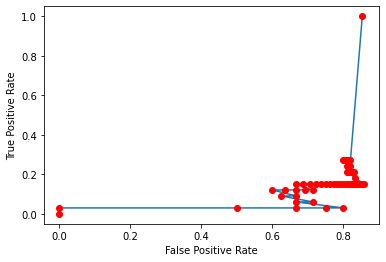

In [47]:
shd = cdt.metrics.SHD(H, dgraph)
auc, roc = cdt.metrics.precision_recall(H, dgraph)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("CGNN Metrics:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

CGNN Metrics:
Structural hamming distance: 76
Area under the curve: 0.119


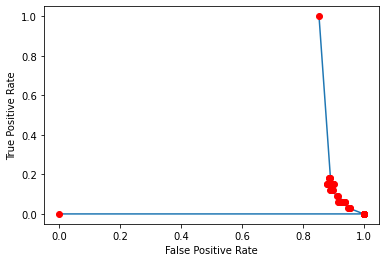

In [41]:
shd = cdt.metrics.SHD(H, dgraph)
auc, roc = cdt.metrics.precision_recall(H, dgraph)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("CGNN Metrics:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

100%|██████████| 25/25 [01:31<00:00,  3.67s/it, disc=0.0221, gen=-.848, regul_loss=0.41, tot=5.24e+5]


--- Execution time : 466. seconds ---


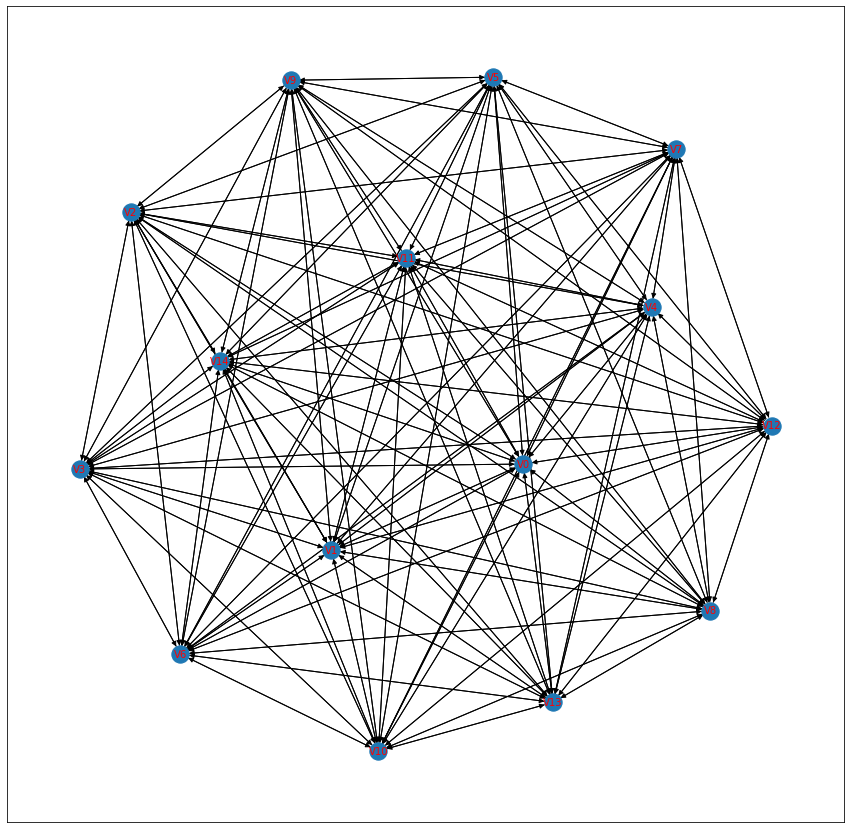

In [25]:
# Finding the structure of the graph
# from cdt.independence.graph 

# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=5, train_epochs=20, test_epochs=5,verbose=True)


start_time = time.time()
predict = model_sam.predict(data)
# predict.

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(predict, font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()




In [32]:
!apt install SID

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package SID


SAM Metrics:
Structural hamming distance: 177
Area under the curve: 0.160


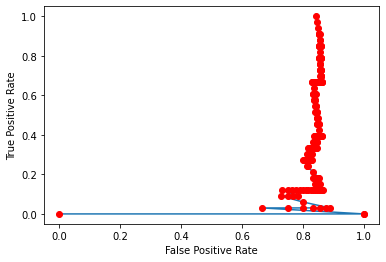

In [36]:
shd = cdt.metrics.SHD(H, predict)
# sid = cdt.metrics.SID(H, predict)
auc, roc = cdt.metrics.precision_recall(H, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("SAM Metrics:")
print(f"Structural hamming distance: {shd}")
# print(f"Structural id: {sid}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()